<a href="https://colab.research.google.com/github/Vaibhavrsonawane2000/Flight-Booking-Prize-prediction/blob/main/Flight_Booking_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Flight_Booking.csv")
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [ ]:
df.info()
df.describe()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13448 entries, 0 to 13447
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13448 non-null  int64  
 1   airline           13448 non-null  object 
 2   flight            13448 non-null  object 
 3   source_city       13448 non-null  object 
 4   departure_time    13448 non-null  object 
 5   stops             13448 non-null  object 
 6   arrival_time      13447 non-null  object 
 7   destination_city  13447 non-null  object 
 8   class             13447 non-null  object 
 9   duration          13447 non-null  float64
 10  days_left         13447 non-null  float64
 11  price             13447 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,1
destination_city,1
class,1
duration,1


**Data Visualization**

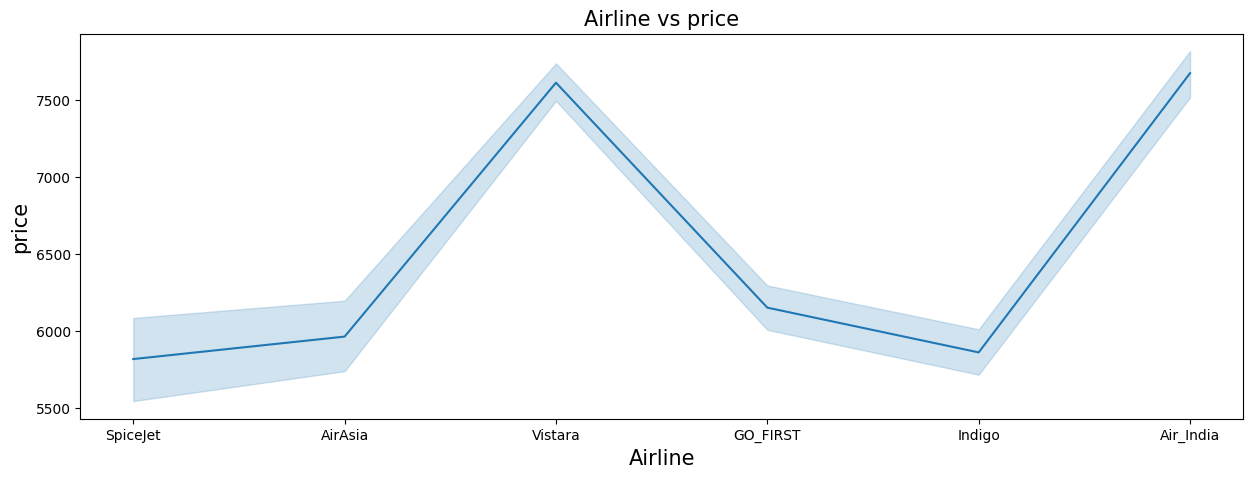

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline vs price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

**#The price of the ticket increases as the days left for departure decreases**

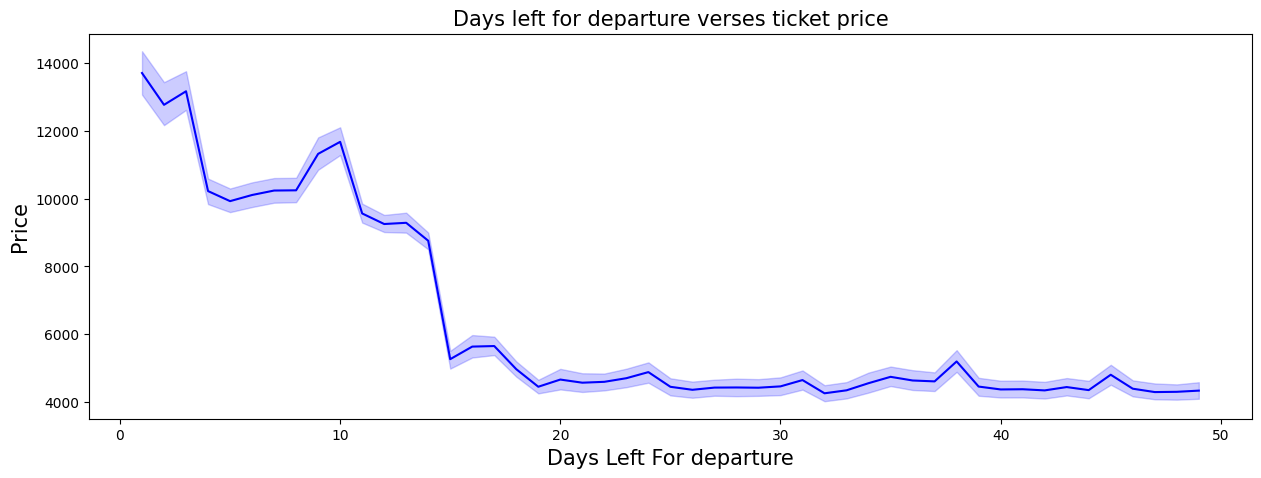

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days left for departure verses ticket price', fontsize=15)
plt.xlabel('Days Left For departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

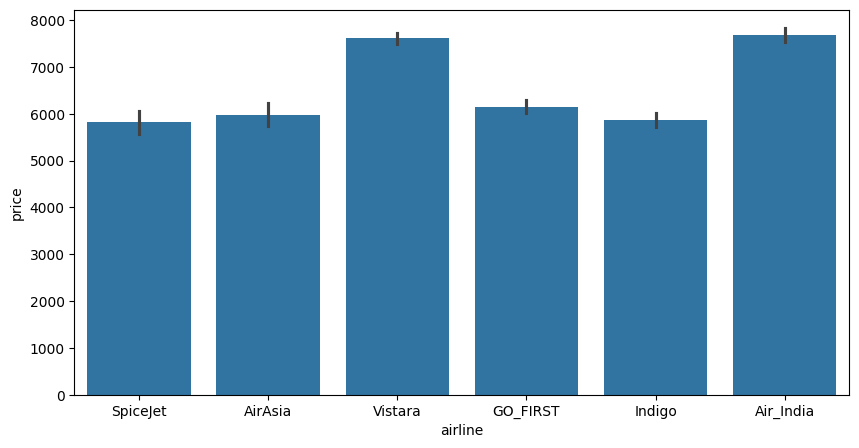

In [ ]:
#Price range of all the flights

plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price', data=df)

<Axes: xlabel='class', ylabel='price'>

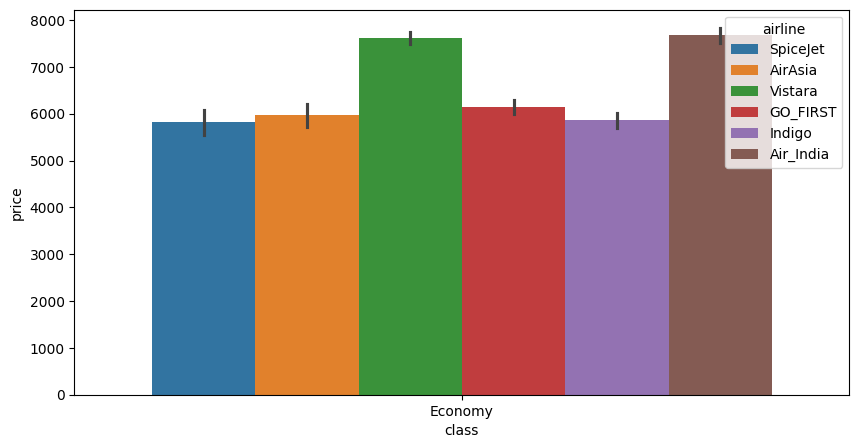

In [ ]:
#Range of price of all the flights of Economy and Business class
plt.figure(figsize=(10,5))
sns.barplot(x='class',y='price', data=df, hue='airline')

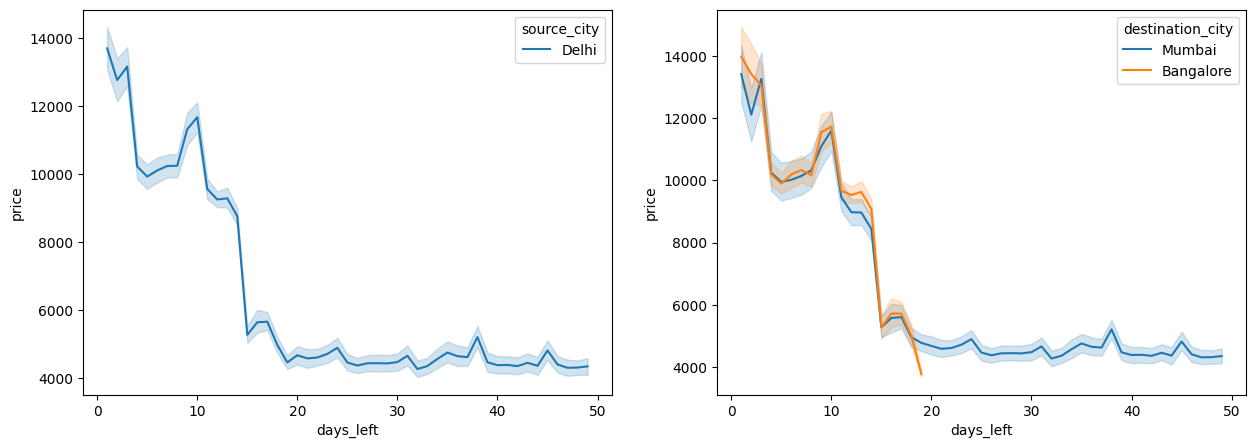

In [ ]:
#Range of price of flights with source and destination city according to the days left
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='days_left',y='price',data=df, hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df, hue='destination_city',ax=ax[1])
plt.show()

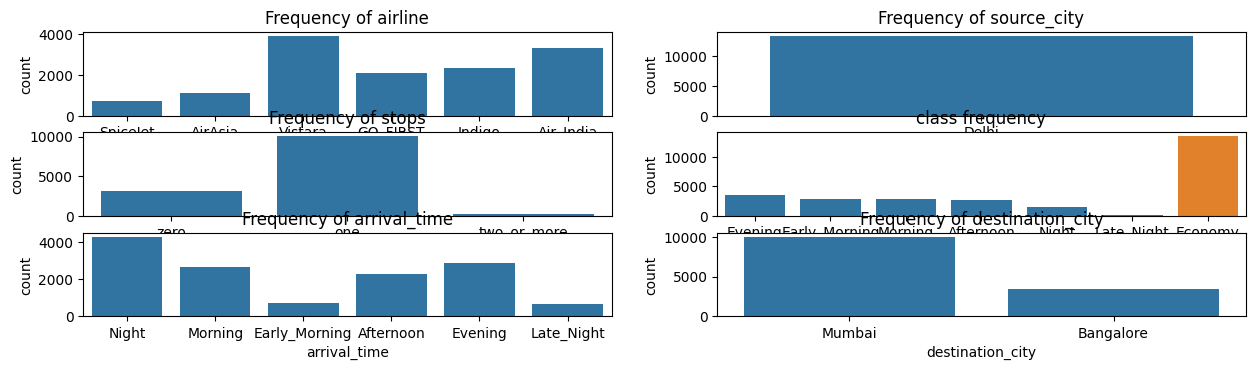

In [ ]:
#Visualization of categorical features with countplot
plt.figure(figsize=(15,5))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of stops')

plt.subplot(4,2,4)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of departure_time')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of destination_city')

plt.subplot(4,2,4)
sns.countplot(x=df['class'],data=df)
plt.title('class frequency')

plt.show()

In [ ]:
#Performing One Hot Encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"] = le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13448 entries, 0 to 13447
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13448 non-null  int64  
 1   airline           13448 non-null  int64  
 2   flight            13448 non-null  object 
 3   source_city       13448 non-null  int64  
 4   departure_time    13448 non-null  int64  
 5   stops             13448 non-null  int64  
 6   arrival_time      13448 non-null  int64  
 7   destination_city  13448 non-null  int64  
 8   class             13448 non-null  int64  
 9   duration          13447 non-null  float64
 10  days_left         13447 non-null  float64
 11  price             13447 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.2+ MB


**Feature Selection**

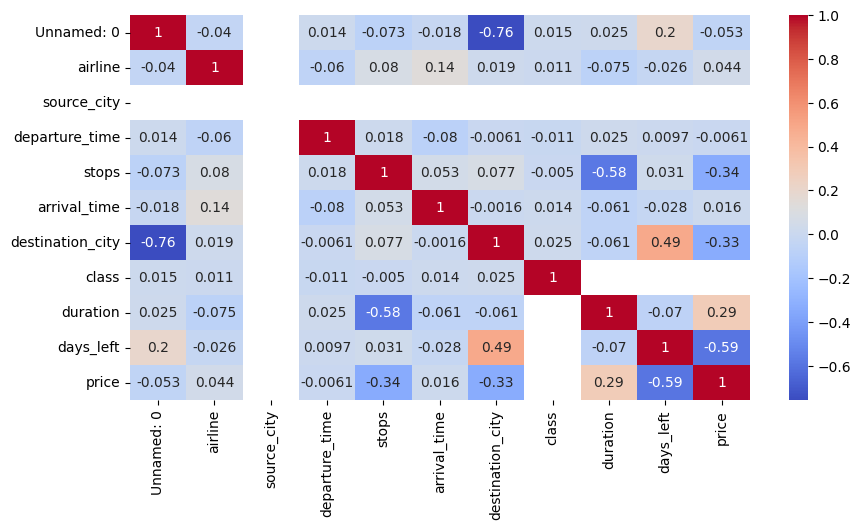

In [ ]:
plt.figure(figsize=(10, 5))

numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list= []
for col in df.columns:

  if((df[col].dtype != 'object') and (col != 'price')):
    col_list.append(col)
X = df[col_list]
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,Unnamed: 0,11.144051
1,airline,3.586560
2,source_city,NaN
3,departure_time,2.705649
4,stops,1.992968
5,arrival_time,3.731884
6,destination_city,14.899298
7,class,NaN
8,duration,4.473257
9,days_left,12.927233


In [ ]:
df = df.drop(columns=["stops"], errors="ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list= []
for col in df.columns:
  # Correctly exclude the 'price' column (lowercase 'p')
  if((df[col].dtype !='object') & (col !='price')):
    col_list.append(col)

X=df[col_list]

# Drop rows with any NaN values from X before calculating VIF
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Unnamed: 0,3.131974
1,duration,2.158116
2,days_left,2.786111


**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Corrected import
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Flight_Booking.csv")
df = df.dropna().reset_index(drop=True)
le = LabelEncoder()
for col in ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
df_processed = df.drop(columns=["Unnamed: 0", "stops", "source_city", "class", "flight"], errors="ignore")
x = df_processed.drop(columns=["price"])
y = df_processed["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"]) # Corrected typos: differnce and Dataframe
difference

,Actual_Value,Predicted_Value
0,12189.0,10285.144226
1,7425.0,7829.135588
2,5241.0,4496.558970
3,2476.0,3778.793573
4,6165.0,8110.212338
...,...,...
2685,7425.0,7724.604000
2686,4055.0,3642.769492
2687,5040.0,3769.699876
2688,9945.0,8541.860354


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
from sklearn import metrics
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
#from sklearn.metrics import mean_squared_error
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
mean_squared_error
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_squared_error

np.float64(3183.1958250964244)

/tmp/ipython-input-1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
/tmp/ipython-input-1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


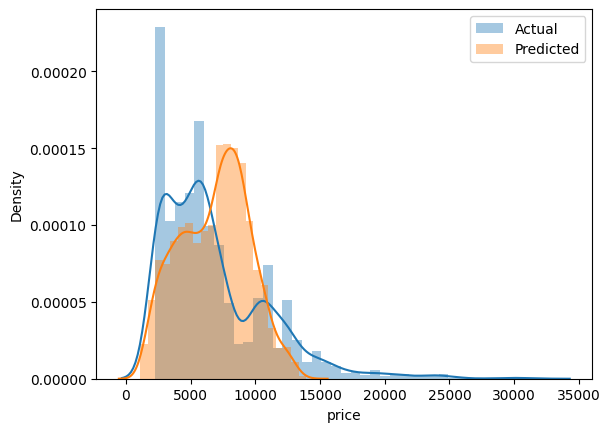

In [ ]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

**Decision Tree Regressor**

/tmp/ipython-input-2429069691.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
/tmp/ipython-input-2429069691.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


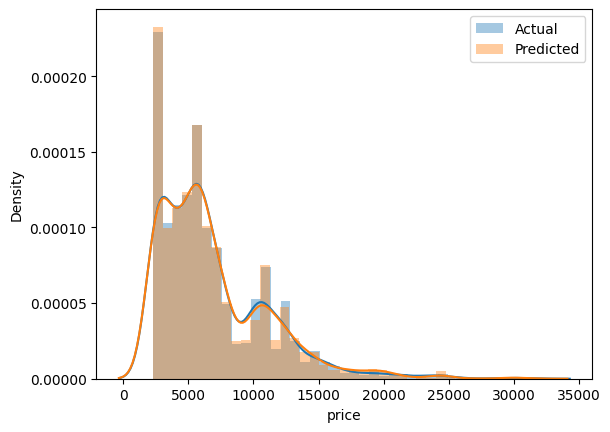

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
mean_squared_error
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_squared_error

sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

**Random forest Regressor**

/tmp/ipython-input-240505455.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
/tmp/ipython-input-240505455.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


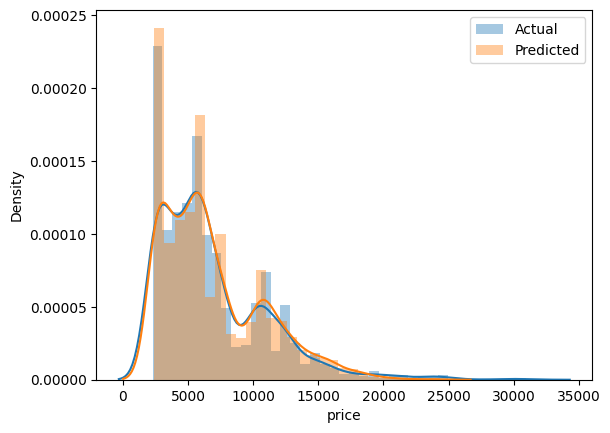

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
mean_squared_error
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_squared_error

sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

**Project Summary**

This project aimed to predict flight ticket prices using a dataset containing various flight-related features. The workflow involved several key stages:

**Data Loading and Initial Exploration:** The Flight_Booking.csv dataset was loaded, and an initial overview revealed its structure, data types, and the presence of a few missing values in some columns.

**Data Visualization:** Exploratory Data Analysis (EDA) was performed to understand the relationships between features and the target variable (price).

**Key insights included:**
Significant price variations across different airlines, with some premium airlines generally having higher fares.
A clear trend showing that ticket prices tend to increase as the number of days left until departure decreases.
The distribution of flights across different source/destination cities, departure/arrival times, and types of stops was also visualized.

**Data Preprocessing:**
Categorical features such as airline, source_city, departure_time, stops, arrival_time, destination_city, and class were converted into numerical representations using LabelEncoder.
To address multicollinearity and simplify the model, Variance Inflation Factor (VIF) analysis was conducted. This led to the identification and removal of highly correlated or non-informative columns like Unnamed: 0, stops, source_city, class, and flight.
Missing values were handled by dropping the corresponding rows to ensure data integrity for modeling.
The features were scaled using StandardScaler to normalize their ranges, which is crucial for models sensitive to feature scales.

**Model Training and Evaluation:** Three different regression models were trained and evaluated:

Linear Regression: This model provided a baseline for prediction.
Decision Tree Regressor: A tree-based model was implemented to capture non-linear relationships.
Random Forest Regressor: An ensemble method, building on decision trees, was used to improve predictive accuracy and robustness.

**Conclusion**

Upon evaluating the performance of each model using metrics such as R-squared (R2), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Squared Error (RMSE), the following was observed:

**Linear Regression:** Achieved an R2 score of approximately 0.59, with an MAE of around 2778 and an RMSE of approximately 4079.
Decision Tree Regressor: Showed improved performance with an R2 score of approximately 0.78, an MAE of around 1917, and an RMSE of approximately 2949.

**Random Forest Regressor:** Demonstrated the best performance among the three models, achieving an R2 score of approximately 0.87, an MAE of around 1298, and an RMSE of approximately 2354.
The Random Forest Regressor emerged as the most effective model for predicting flight prices in this project, offering a significantly higher R2 score and lower error metrics compared to Linear Regression and Decision Tree Regressor. This suggests that the ensemble approach of Random Forest was better at capturing the complex, non-linear patterns within the flight booking data. The visual comparisons of actual vs. predicted prices also indicated a better fit for the Random Forest model.